# Data Science Final Project - Football Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#For Linear Regression and Logistic Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For Principal Component Analyseis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# For prediction analysis
from sklearn import metrics
from sklearn.metrics import classification_report

# ***1. Data Exploration***

In [4]:
train_x = pd.read_csv('football_train_x.csv')
train_y = pd.read_csv('football_train_y.csv')
test_x = pd.read_csv('football_test_x.csv')
test_y = pd.read_csv('football_test_y.csv')

In [5]:
# Train files has total of 798 data
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 13 columns):
HomeTeam    798 non-null int64
AwayTeam    798 non-null int64
HTHG        798 non-null int64
HTAG        798 non-null int64
HTR         798 non-null int64
HS          798 non-null int64
AS          798 non-null int64
HST         798 non-null int64
AST         798 non-null int64
HF          798 non-null int64
AF          798 non-null int64
HC          798 non-null int64
AC          798 non-null int64
dtypes: int64(13)
memory usage: 81.2 KB


In [6]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 2 columns):
Interest    798 non-null int64
FTG         798 non-null int64
dtypes: int64(2)
memory usage: 12.6 KB


In [7]:
# Test files has total of 342 data
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 13 columns):
HomeTeam    342 non-null int64
AwayTeam    342 non-null int64
HTHG        342 non-null int64
HTAG        342 non-null int64
HTR         342 non-null int64
HS          342 non-null int64
AS          342 non-null int64
HST         342 non-null int64
AST         342 non-null int64
HF          342 non-null int64
AF          342 non-null int64
HC          342 non-null int64
AC          342 non-null int64
dtypes: int64(13)
memory usage: 34.9 KB


In [8]:
test_y.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
Interest    342 non-null int64
FTG         342 non-null int64
dtypes: int64(2)
memory usage: 5.5 KB


In [9]:
train_x.describe()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,13.073935,12.948622,0.644110,0.545113,0.060150,13.850877,11.161654,4.649123,3.834586,10.567669,10.819549,5.667920,4.542607
std,7.377833,7.484060,0.828392,0.761261,0.767202,5.872469,4.840511,2.733168,2.303280,3.447008,3.448858,3.037821,2.747886
min,0.000000,0.000000,0.000000,0.000000,-1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,6.000000,6.000000,0.000000,0.000000,-1.000000,9.250000,7.000000,3.000000,2.000000,8.000000,9.000000,3.000000,3.000000
50%,14.000000,14.000000,0.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,11.000000,10.000000,5.000000,4.000000
75%,19.000000,19.000000,1.000000,1.000000,1.000000,17.000000,14.000000,6.000000,5.000000,13.000000,13.000000,8.000000,6.000000
max,25.000000,25.000000,4.000000,4.000000,1.000000,37.000000,30.000000,17.000000,14.000000,23.000000,21.000000,19.000000,15.000000


In [10]:
test_x.describe()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,12.216374,12.508772,0.710526,0.505848,0.131579,14.020468,11.195906,4.932749,3.883041,10.271930,10.821637,5.786550,4.795322
std,7.518109,7.294692,0.860236,0.753269,0.764074,5.736864,4.881551,2.719245,2.386006,3.154716,3.652870,2.952914,2.700968
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
25%,5.000000,6.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,3.000000
50%,13.000000,13.000000,0.000000,0.000000,0.000000,13.000000,11.000000,5.000000,4.000000,10.000000,10.500000,5.000000,5.000000
75%,19.000000,19.000000,1.000000,1.000000,1.000000,18.000000,14.000000,7.000000,5.000000,12.000000,13.000000,8.000000,7.000000
max,25.000000,25.000000,4.000000,4.000000,1.000000,32.000000,29.000000,14.000000,15.000000,24.000000,26.000000,16.000000,14.000000


In [11]:
corr = train_x.corr(method="pearson")

In [12]:
# Check whether the train_x or test_x contains any null data 
train_x.isnull().head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


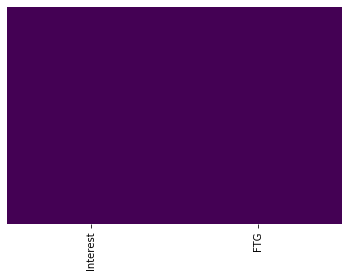

In [13]:
sns.heatmap(train_x.isnull(), yticklabels=False, cbar=False, cmap="viridis")
sns.heatmap(test_x.isnull(), yticklabels=False, cbar=False, cmap="viridis")
sns.heatmap(train_y.isnull(), yticklabels=False, cbar=False, cmap="viridis")
sns.heatmap(test_y.isnull(), yticklabels=False, cbar=False, cmap="viridis")

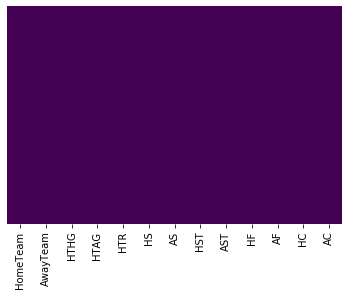

In [14]:
sns.heatmap(test_x.isnull(), yticklabels=False, cbar=False, cmap="viridis")

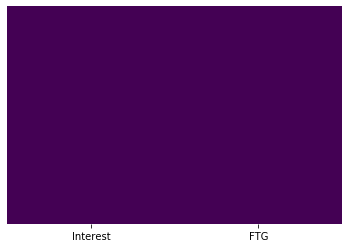

In [15]:
sns.heatmap(train_y.isnull(), yticklabels=False, cbar=False, cmap="viridis")

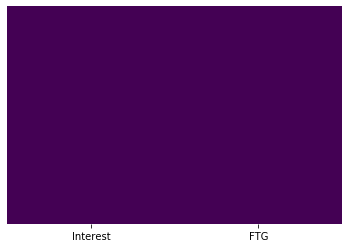

In [16]:
sns.heatmap(test_y.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [17]:
corr

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
HomeTeam,1.000000,-0.046946,0.000821,-0.040918,0.024040,0.060056,0.026261,0.026177,0.010910,0.014629,0.055605,0.038773,0.036823
AwayTeam,-0.046946,1.000000,-0.027036,-0.013577,0.002724,-0.028152,0.030119,-0.023762,0.015520,0.004926,-0.012998,0.022427,0.071642
HTHG,0.000821,-0.027036,1.000000,-0.072001,0.665477,0.155435,-0.048216,0.408615,-0.080869,-0.066694,0.049078,-0.041039,0.017694
HTAG,-0.040918,-0.013577,-0.072001,1.000000,-0.664186,-0.117916,0.188188,-0.123241,0.396402,0.065537,-0.000241,-0.101212,-0.064199
HTR,0.024040,0.002724,0.665477,-0.664186,1.000000,0.168810,-0.157025,0.334990,-0.308912,-0.085993,0.029714,0.039268,0.055323
HS,0.060056,-0.028152,0.155435,-0.117916,0.168810,1.000000,-0.492059,0.708889,-0.317591,-0.121702,0.016326,0.581969,-0.403654
AS,0.026261,0.030119,-0.048216,0.188188,-0.157025,-0.492059,1.000000,-0.343100,0.681688,0.087664,-0.051913,-0.383816,0.549852
HST,0.026177,-0.023762,0.408615,-0.123241,0.334990,0.708889,-0.343100,1.000000,-0.237640,-0.040493,0.004456,0.367217,-0.257454
AST,0.010910,0.015520,-0.080869,0.396402,-0.308912,-0.317591,0.681688,-0.237640,1.000000,0.099235,-0.058729,-0.236496,0.288963
HF,0.014629,0.004926,-0.066694,0.065537,-0.085993,-0.121702,0.087664,-0.040493,0.099235,1.000000,0.112903,-0.073759,0.001881


(13.0, 0.0)

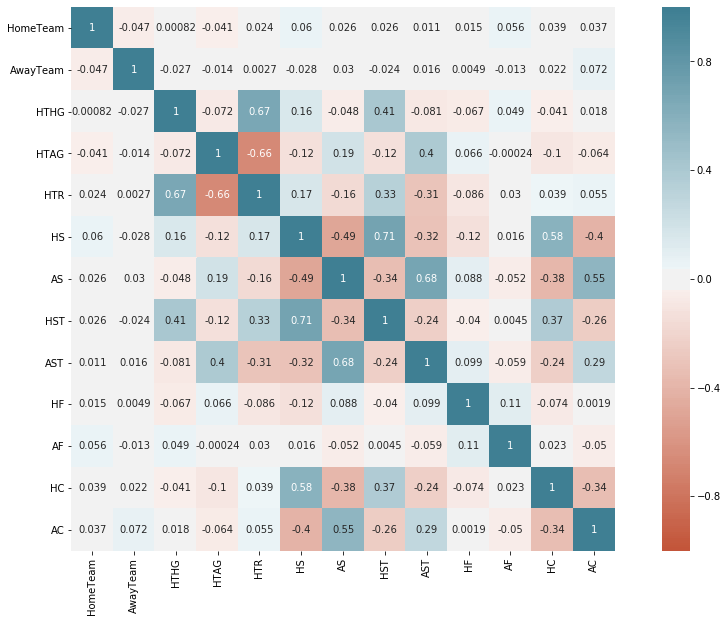

In [18]:
plt.figure(figsize=(17,10))
ax = sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap=sns.diverging_palette(20, 220, n=200), square = True, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

***From the heatmap above, we can find high correlations:<br>
<br>
(HS, HST) = 0.71<br>
(AS, AST) = 0.68<br>
(HTHG, HTR) = 0.67<br>
(HC, HS) = 0.58<br>
(AC, AS) = 0.55<br>
(HTHG, HST) = 0.41<br>
(HTAG, AST) = 0.40<br>***

In [19]:
df_pairplot = train_x[["HS", "HST" ]]

Text(0.5, 0.98, 'Home Shot / Home Shot on Target')

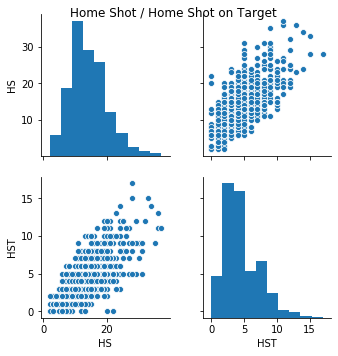

In [20]:
g = sns.pairplot(df_pairplot)
g.fig.suptitle("Home Shot / Home Shot on Target")

In [21]:
df_pairplot_2 = train_x[["HTHG", "HTAG", "HTR"]]

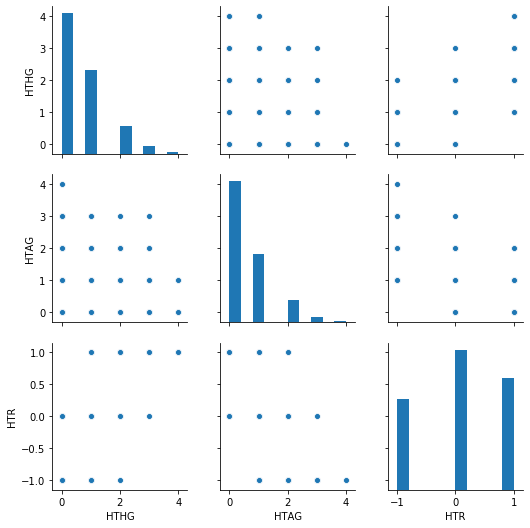

In [22]:
sns.pairplot(df_pairplot_2)

sns.boxplot(x="HomeTeam", y="HTHG", data=train_x, palette="rainbow")

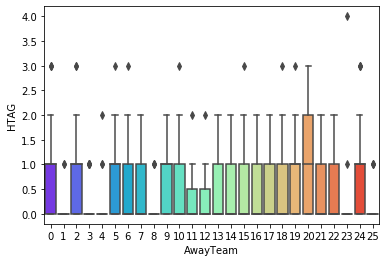

In [23]:
sns.boxplot(x="AwayTeam", y="HTAG", data=train_x, palette="rainbow")

***It can be said that the team number 20 made most half time goals as both home team and away team***

In [24]:
# It is possible to compare all halftime goals (HTHG + HTAG) of each team 
train_x[train_x["HomeTeam"] == 20]["HTHG"].sum()

53

# ***2. Principal Component Analysis***

In [25]:
train_x.head()

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,19,8,2,1,1,18,6,7,2,8,10,5,4
1,24,16,2,0,1,12,8,6,3,12,13,5,1
2,3,12,0,0,0,13,8,4,4,8,8,0,11
3,2,20,0,0,0,7,6,2,2,10,10,2,6
4,24,9,0,1,-1,14,11,6,3,13,16,4,5


In [26]:
new_train_x = train_x[['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC']]

In [27]:
new_test_x = test_x[['HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC']]

In [28]:
new_train_y = train_y[['FTG']]

In [29]:
new_test_y = test_y[['FTG']]

In [85]:
#scaler = MinMaxScaler(feature_range=[0, 1])
scaler = StandardScaler()

In [86]:
scaled_train_x = scaler.fit_transform(new_train_x)

In [87]:
scaled_train_x›

array([[ 1.63780053,  0.59791921,  1.22580442, ..., -0.23777807,
        -0.22000597, -0.19758706],
       [ 1.63780053, -0.71651476,  1.22580442, ...,  0.63262054,
        -0.22000597, -1.29001992],
       [-0.77803093, -0.71651476, -0.07845148, ..., -0.8180438 ,
        -1.86695496,  2.35142294],
       ...,
       [-0.77803093,  1.91235319, -1.38270739, ...,  0.63262054,
        -1.20817536, -0.56173135],
       [ 0.4298848 , -0.71651476,  1.22580442, ...,  1.79315202,
        -0.22000597, -0.19758706],
       [ 0.4298848 ,  0.59791921, -0.07845148, ...,  0.63262054,
         1.09755322, -0.92587564]])

In [88]:
scaled_test_x = scaler.fit_transform(new_test_x)

In [89]:
scaled_test_x

array([[-0.82717683, -0.67252075, -0.17245937, ...,  0.04889961,
         2.44640358,  0.81745092],
       [-0.82717683,  0.65697114, -1.48315057, ...,  0.32305805,
         0.75067998, -0.66566959],
       [ 0.33699797,  0.65697114, -0.17245937, ...,  0.32305805,
        -0.26675418,  0.07589067],
       ...,
       [-0.82717683,  0.65697114, -1.48315057, ..., -0.77357574,
         0.41153526, -0.29488946],
       [-0.82717683, -0.67252075, -0.17245937, ...,  0.5972165 ,
        -1.28418834, -1.40722984],
       [ 1.50117276, -0.67252075,  1.13823184, ...,  1.41969185,
        -1.62333306,  3.04213169]])

In [114]:
pca = PCA(n_components=8).fit(scaled_train_x)

In [115]:
train_x_pca = pca.transform(scaled_train_x)

In [116]:
test_x_pca = pca.transform(scaled_test_x)

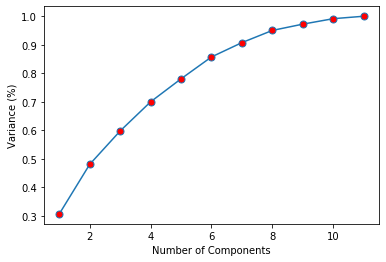

In [113]:
plt.figure()
plt.plot(np.arange(1,12,1),np.cumsum(pca.explained_variance_ratio_), marker='o',
         markerfacecolor='red', markersize=7)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

In [39]:
plt.figure()
plt.plot(np.cumsum(test_x_pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title("test_x PCA explained variance")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'explained_variance_ratio_'

<Figure size 432x288 with 0 Axes>

In [ ]:
scaled_train_x.shape

In [ ]:
train_x_pca.shape

In [ ]:
scaled_test_x.shape

In [ ]:
test_x_pca.shape

In [ ]:
train_x_pca[:5]

In [ ]:
test_x_pca[:5]

# Linear Regression

In [ ]:
# X = test_x.iloc[:,2:]

In [ ]:
# y = test_y["FTG"]

In [99]:
#X_train = scaled_train_x
#X_test = scaled_test_x

x_train = train_x.iloc[:,2:]
x_test = test_x.iloc[:,2:]

#X_train = train_x_pca
#X_test = test_x_pca

y_train = train_y["FTG"]
y_test = test_y["FTG"]

In [100]:
lm = LinearRegression()

In [101]:
# lm.fit(X_train, y_train)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
lm.coef_

array([ 0.71653537,  0.5618212 , -0.07308082, -0.03489569, -0.06412117,
        0.44825607,  0.42318644, -0.00741519, -0.08382943, -0.1143037 ,
       -0.03525188])

In [103]:
cdf = pd.DataFrame(data=lm.coef_, index=train_x.iloc[:,2:].columns, columns=['Coefficient'])
cdf

,Coefficient
HTHG,0.716535
HTAG,0.561821
HTR,-0.073081
HS,-0.034896
AS,-0.064121
HST,0.448256
AST,0.423186
HF,-0.007415
AF,-0.083829
HC,-0.114304


In [104]:
cdf

,Coefficient
HTHG,0.716535
HTAG,0.561821
HTR,-0.073081
HS,-0.034896
AS,-0.064121
HST,0.448256
AST,0.423186
HF,-0.007415
AF,-0.083829
HC,-0.114304


In [105]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

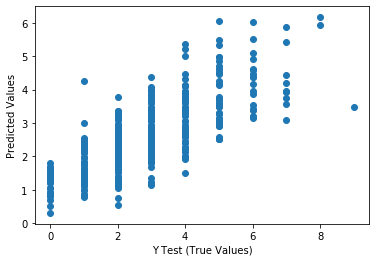

In [106]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Predicted Values")

In [107]:
metrics.explained_variance_score(y_test, predictions)

0.5460720251435149

In [66]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9489268858420832
MSE: 1.4779766566720058
RMSE: 1.2157206326586738


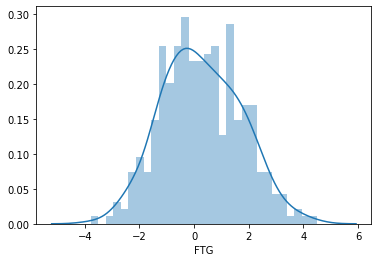

In [422]:
sns.distplot((y_test-predictions),bins=30);

# Logistic Regression

In [117]:
logmodel = LogisticRegression()

In [118]:
#X_train = train_x.iloc[:,2:]
#X_test = test_x.iloc[:,2:]
X_train = train_x_pca
X_test = test_x_pca

y_train = train_y["Interest"]
y_test = test_y["Interest"]

In [119]:
train_x

,HomeTeam,AwayTeam,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC
0,19,8,2,1,1,18,6,7,2,8,10,5,4
1,24,16,2,0,1,12,8,6,3,12,13,5,1
2,3,12,0,0,0,13,8,4,4,8,8,0,11
3,2,20,0,0,0,7,6,2,2,10,10,2,6
4,24,9,0,1,-1,14,11,6,3,13,16,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,25,20,0,0,0,10,16,3,6,11,14,4,7
794,6,16,1,0,1,16,15,5,4,6,12,5,4
795,9,2,0,2,-1,6,15,1,7,9,13,2,3
796,0,7,1,0,1,15,11,6,8,5,17,5,4


In [120]:
logmodel.fit(X_train,y_train)

/Users/J.H/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
predictions = logmodel.predict(X_test)

In [122]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       194
           1       0.64      0.51      0.57       148

    accuracy                           0.67       342
   macro avg       0.66      0.65      0.65       342
weighted avg       0.66      0.67      0.66       342



In [620]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[152,  42],
       [ 73,  75]], dtype=int64)

# KNN Algorithm

In [622]:
from sklearn.neighbors import KNeighborsClassifier

In [708]:
X_train = train_x.iloc[:,2:]
X_test = test_x.iloc[:,2:]
#X_train = train_x_pca
#X_test = test_x_pca

y_train = train_y["Interest"]
y_test = test_y["Interest"]

In [709]:
knn = KNeighborsClassifier(n_neighbors=3)

In [710]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [711]:
pred = knn.predict(X_test)

In [712]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67       194
           1       0.54      0.44      0.48       148

    accuracy                           0.59       342
   macro avg       0.58      0.58      0.57       342
weighted avg       0.59      0.59      0.59       342



In [699]:
print(confusion_matrix(y_test,pred))

[[173  21]
 [ 74  74]]


In [681]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

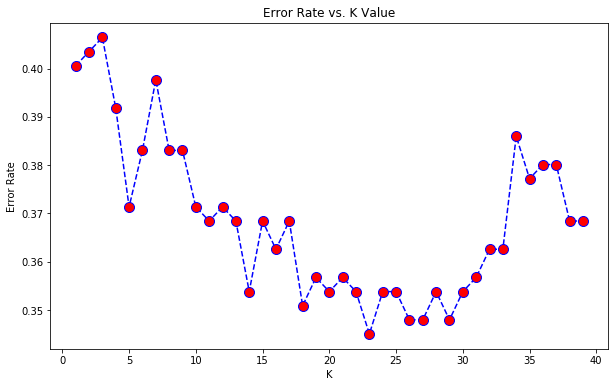

In [682]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')